# Workshop 2: Ordinary Differential Equations

In [1]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)


## Compound interest

Consider a continuously compounded investment, where the growth rate is given by

$$
ds/dt = rs\,.
$$

By separating the variables, we rewrite the equation as 

$$
\frac{ds}{s} = r\,dt\,.
$$
Integrating both sides gives

$$
\ln s = rt + c \rightarrow s = c\,e^{rt}\,.
$$
Using the initial condition $s(0) = s_0$, we get that $c = s_0$ and

$$
s(t) = s_0 e^{rt}\,.
$$

Let us now plot the results!

[Text(0.5, 0, '$t$ (years)'), Text(0, 0.5, 'Investment Value $s$ (\\$)')]

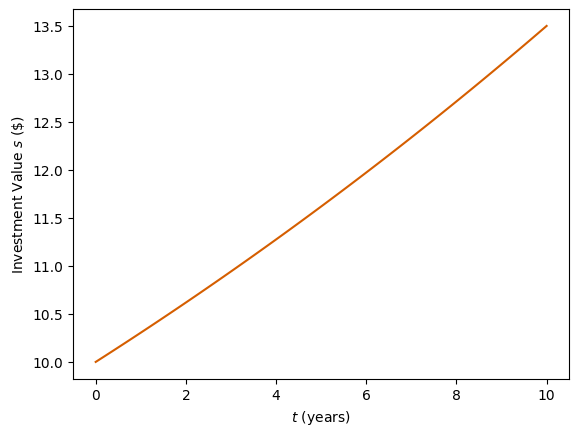

In [16]:
s0 = 10     # Initial investment
r = 0.03    # Annual rate

t_max = 10
n_pts = 100

ts = np.linspace(0, t_max, n_pts)
s = [(s0 * np.exp(r * t)) for t in ts]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ts, s, color = CF_vermillion)
ax.set(xlabel = "$t$ (years)", ylabel = "Investment Value $s$ (\$)")

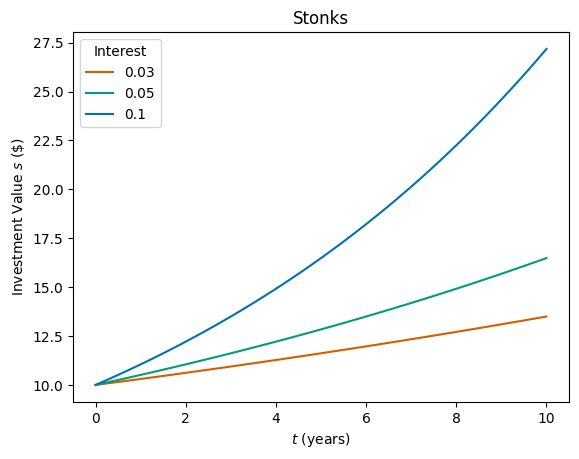

In [22]:
s0 = 10     # Initial investment

t_max = 10
n_pts = 100

ts = np.linspace(0, t_max, n_pts)

rs = [0.03, 0.05, 0.1]
colors = [CF_vermillion, CF_green, CF_blue]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(0, 3):
    r = rs[i]
    s = [(s0 * np.exp(r * t)) for t in ts]
    ax.plot(ts, s, color = colors[i], label = str(r))

ax.set(xlabel = "$t$ (years)", ylabel = "Investment Value $s$ (\$)", title = "Stonks")
ax.legend(title = "Interest")

## Bacterial growth

Bacterial growth is often modeled using exponential growth, mathematically identical to the investment model above. Unlike money, however, too much bacteria in one place leads to competition. In particular, the equation describing the population change becomes

$$
\dot{N} = rN(1 - N / K)\,,
$$
which can be solved to yield

$$
N(t) = \frac{N_0e^{rt}}{1 + \frac{N_0}{K}\left(e^{rt} - 1\right)}\,.
$$

[Text(0.5, 0, 'Time (arb. units)'), Text(0, 0.5, 'Population')]

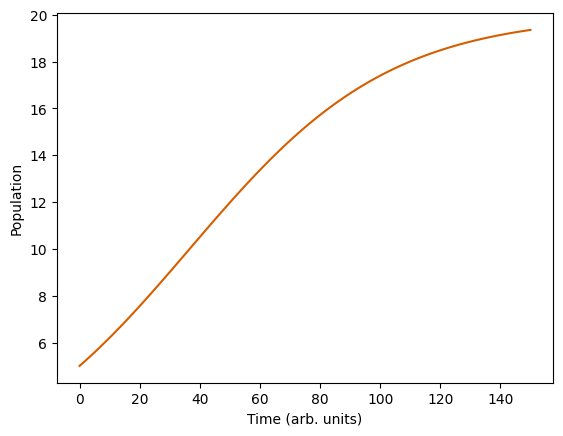

In [28]:
N0 = 5      # Initial population
r = 0.03    # Growth rate
K = 20      # Carrying capacity

t_max = 150
n_pts = 100

ts = np.linspace(0, t_max, n_pts)
N = [((N0 * np.exp(r * t)) / (1 + (N0 / K) * (np.exp(r * t) - 1))) for t in ts]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ts, N, color = CF_vermillion)
ax.set(xlabel = "Time (arb. units)", ylabel = "Population")

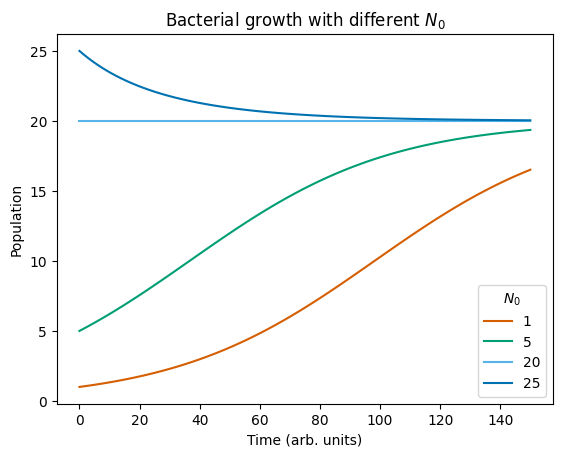

In [36]:
N0s = [1, 5, 20, 25]    # Initial population
r = 0.03                # Growth rate
K = 20                  # Carrying capacity

colors = [CF_vermillion, CF_green, CF_sky, CF_blue]

t_max = 150
n_pts = 100

ts = np.linspace(0, t_max, n_pts)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(0, 4):
    N0 = N0s[i]
    N = [((N0 * np.exp(r * t)) / (1 + (N0 / K) * (np.exp(r * t) - 1))) for t in ts]
    ax.plot(ts, N, color = colors[i], label = str(N0))

ax.set(xlabel = "Time (arb. units)", ylabel = "Population", title = "Bacterial growth with different $N_0$")
ax.legend(title = "$N_0$")

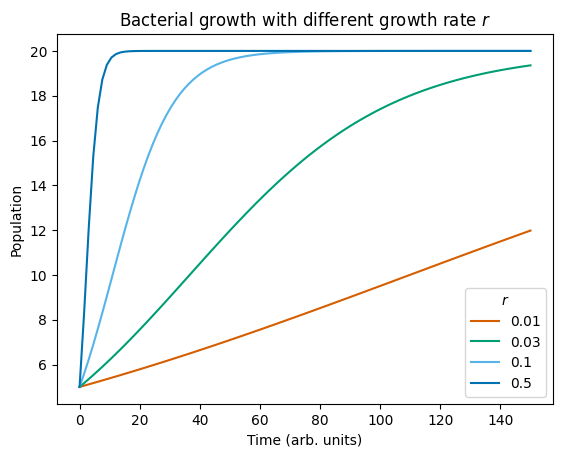

In [3]:
N0 = 5                          # Initial population
rs = [0.01, 0.03, 0.1, 0.5]     # Growth rate
K = 20                          # Carrying capacity

colors = [CF_vermillion, CF_green, CF_sky, CF_blue]

t_max = 150
n_pts = 100

ts = np.linspace(0, t_max, n_pts)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(0, 4):
    r = rs[i]
    N = [((N0 * np.exp(r * t)) / (1 + (N0 / K) * (np.exp(r * t) - 1))) for t in ts]
    ax.plot(ts, N, color = colors[i], label = str(r))

ax.set(xlabel = "Time (arb. units)", ylabel = "Population", title = "Bacterial growth with different growth rate $r$")
ax.legend(title = "$r$")

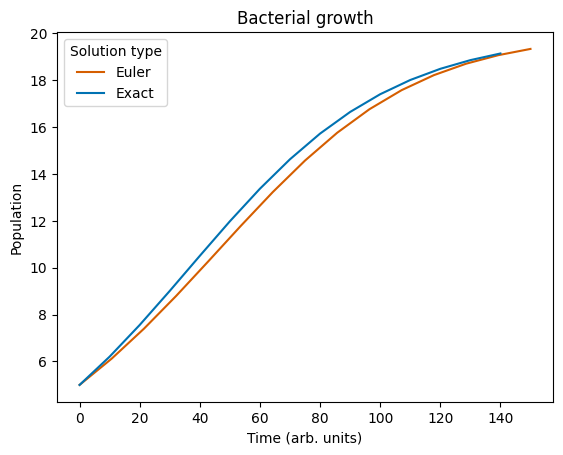

In [50]:
# Euler method (attempt)

N0 = 5      # Initial population
r = 0.03    # Growth rate
K = 20      # Carrying capacity

t_max = 150
e = 10
Ns = [N0]

steps = int(t_max / e)
ts = np.linspace(0, t_max, steps)

for i in range(0, steps - 1):
    prev_N = Ns[i]
    next_N = prev_N + e * (r * prev_N * (1 - (prev_N / K)))
    Ns.append(next_N)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ts, Ns, color = CF_vermillion, label = "Euler")

ts = np.arange(0, steps) * e
Ns_exact = [((N0 * np.exp(r * t)) / (1 + (N0 / K) * (np.exp(r * t) - 1))) for t in ts]
ax.plot(ts, Ns_exact, color = CF_blue, label = "Exact")

ax.set(xlabel = "Time (arb. units)", ylabel = "Population", title = "Bacterial growth")
ax.legend(title = "Solution type")

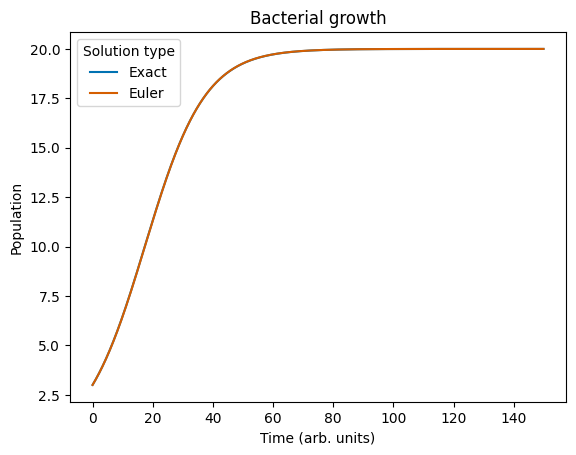

In [51]:
## Euler method (solution)

r = 0.1
K = 20

def derivative(t, N):
    return (r * N * (1 - N / K))

t_max = 150
epsilon = 0.1
n_pts = int(np.floor(t_max / epsilon))

Ns = [0] * n_pts
N0 = 3
Ns[0] = N0

for step in range(1, n_pts):
    d = derivative(step * epsilon, Ns[step - 1])
    Ns[step] = Ns[step - 1] + epsilon * d

ts = np.arange(0, n_pts) * epsilon
Ns_exact = [((N0 * np.exp(r * t)) / (1 + (N0 / K) * (np.exp(r * t) - 1))) for t in ts]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ts, Ns_exact, color = CF_blue, label = "Exact")
ax.plot(ts, Ns, color = CF_vermillion, label = "Euler")
ax.set(xlabel = "Time (arb. units)", ylabel = "Population", title = "Bacterial growth")
ax.legend(title = "Solution type")


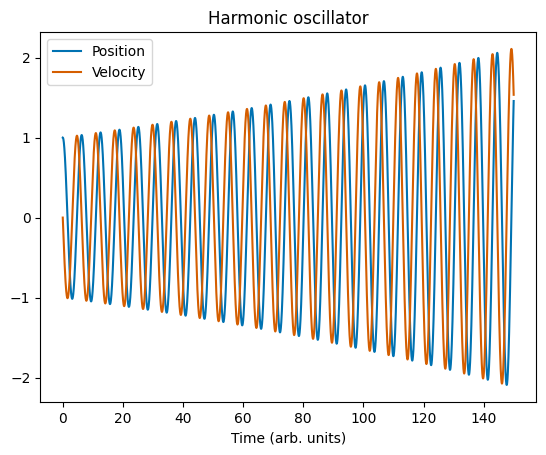

In [62]:
# Harmonic Oscillator

def derivative(t, s):
    x = s[0]
    v = s[1]
    return np.array([v, -x])

t_max = 150
epsilon = 0.01
n_pts = int(np.floor(t_max / epsilon))
ts = np.arange(0, n_pts) * epsilon

sol = [[0, 0]] * n_pts
init = [1, 0]
sol[0] = init

for step in range(1, n_pts):
    d = derivative(step * epsilon, sol[step - 1])
    sol[step] = sol[step - 1] + epsilon * d


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ts, [s[0] for s in sol], color = CF_blue, label = "Position")
ax.plot(ts, [s[1] for s in sol], color = CF_vermillion, label = "Velocity")

ax.set(xlabel = "Time (arb. units)", title = "Harmonic oscillator")
ax.legend()

General Runge-Kutta Solution

$X_{n+1} = X_n + \epsilon \sum_{i=1}^{s}b_ik_i $


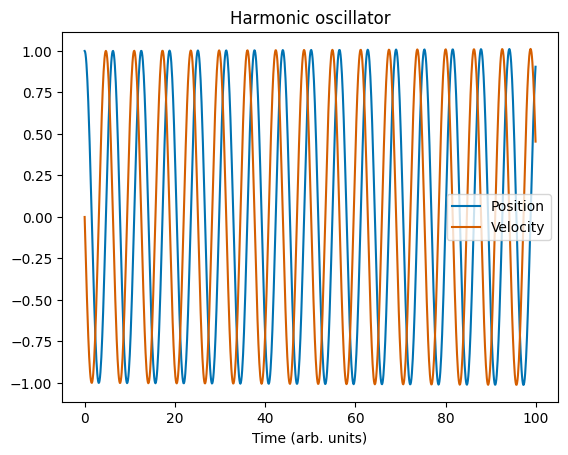

In [2]:
# Harmonic Oscillator using Runge-Kutta 2

def RK2_step(current_state, derivative, epsilon, t):
    k1 = derivative(t, current_state)
    k2 = derivative(t + epsilon, current_state + epsilon * k1)
    res = current_state + epsilon * ((k1 / 2) + (k2 / 2))
    return res

def derivative(t, s):
    x = s[0]
    v = s[1]
    return np.array([v, -x])

t_max = 100
epsilon = 0.1
n_pts = int(np.floor(t_max / epsilon))

sol = [[0, 0]] * n_pts
init = [1, 0]
sol[0] = init

for step in range(1, n_pts):
    sol[step] = RK2_step(sol[step - 1], derivative, epsilon, epsilon * step)

ts = np.arange(0, n_pts) * epsilon

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ts, [s[0] for s in sol], color = CF_blue, label = "Position")
ax.plot(ts, [s[1] for s in sol], color = CF_vermillion, label = "Velocity")

ax.set(xlabel = "Time (arb. units)", title = "Harmonic oscillator")
ax.legend()